In [1]:
!pip install -q pymongo seaborn matplotlib xgboost mlflow dagshub

In [2]:
from pymongo import MongoClient
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# uri = os.getenv('MONGODB_URI')
# client = MongoClient(uri)
# database = client["real_estate"]
# collection = database["commonfloor"]
# datadict_list=[data for data in collection.find({})]
# client.close()

In [5]:
df=pd.DataFrame(datadict_list)
df.drop('_id',axis=1,inplace=True)
df.head()

NameError: name 'datadict_list' is not defined

In [7]:
df=pd.read_csv("D:/Projects/RealEstate_Data/artifacts/11_12_2024/data_ingestion/data.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Projects/RealEstate_Data/artifacts/11_12_2024/data_ingestion/data.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Parking               567 non-null    object 
 1   Direction facing      567 non-null    object 
 2   Listed by             567 non-null    object 
 3   Property on           567 non-null    object 
 4   Listed On             567 non-null    object 
 5   Brokerage terms       567 non-null    object 
 6   Bachelors Allowed     567 non-null    object 
 7   Security Deposit      566 non-null    float64
 8   Pet Allowed           567 non-null    object 
 9   Non Vegetarian        567 non-null    object 
 10  Super Built-Up Area   567 non-null    int64  
 11  Carpet Area           567 non-null    int64  
 12  Bedrooms              542 non-null    float64
 13  Bathrooms             565 non-null    float64
 14  ID                    567 non-null    object 
 15  City                  5

In [4]:
df.describe()

,Security Deposit,Super Built-Up Area,Carpet Area,Bedrooms,Bathrooms,Rent
count,5.660000e+02,567.000000,567.00000,542.000000,565.000000,541.000000
mean,1.794992e+05,1127.118166,950.87478,1.939114,1.877876,23166.706100
std,3.586367e+05,776.626399,673.14653,0.733400,0.913428,18015.599527
min,3.000000e+00,325.000000,166.00000,1.000000,1.000000,2000.000000
25%,5.250000e+04,660.000000,557.00000,1.000000,1.000000,10000.000000
50%,1.000000e+05,959.000000,800.00000,2.000000,2.000000,16500.000000
75%,1.820000e+05,1297.500000,1120.00000,2.000000,2.000000,28000.000000
max,5.000000e+06,9600.000000,7680.00000,4.000000,5.000000,95000.000000


In [5]:
df.drop(["ID","Address","Listed by","Listed On","Available from"],axis=1,inplace=True)
df['Amenities'] = df['Amenities'].apply(lambda x: "No" if len(x)==0 else "Yes")
df.head()

,Parking,Direction facing,Property on,Brokerage terms,Bachelors Allowed,Security Deposit,Pet Allowed,Non Vegetarian,Super Built-Up Area,Carpet Area,Bedrooms,Bathrooms,City,State,Rent,Amenities,Flooring type,Furnishing State,Servant Accomation,Year of Construction
0,Yes,North-West,"""NaN""",No,Yes,140000.0,Yes,No,900,720,2.0,2.0,Chennai,Tamil Nadu,20000.0,Yes,Marbonite,fully furnished,"""NaN""","""NaN"""
1,No,"""NaN""",Ground floor,No,No,126000.0,No,Yes,700,560,2.0,2.0,Chennai,Tamil Nadu,18000.0,Yes,"""NaN""",not furnished,"""NaN""","""NaN"""
2,Yes,North,"""NaN""",No,No,30000.0,No,No,600,469,1.0,1.0,Chennai,Tamil Nadu,7500.0,Yes,Vitrified Tiles,not furnished,"""NaN""","""NaN"""
3,Yes,North,1st floor,No,Yes,315000.0,Yes,No,2000,1600,3.0,2.0,Chennai,Tamil Nadu,45000.0,Yes,Wooden,fully furnished,"""NaN""","""NaN"""
4,Yes,East,1st floor,No,Yes,42000.0,No,Yes,1250,1000,2.0,2.0,Chennai,Tamil Nadu,6000.0,Yes,Vitrified Tiles,semi furnished,"""NaN""","""NaN"""


In [6]:
def property_preprocessing(x):
    if bool(re.search(r'\d', x)):
        return str(re.search(r'\d', x).group())
    elif "Ground" in x:
        return '0'
    else:
        return x

In [7]:
df['Property on'] = df['Property on'].apply(lambda x:property_preprocessing(x))
df['Brokerage terms'] = df['Brokerage terms'].apply(lambda x: "Yes" if bool(re.search(r'\d', x)) else x)
for columns in df.columns:
    df[columns]=df[columns].replace('"NaN"',np.nan)
df.head()

,Parking,Direction facing,Property on,Brokerage terms,Bachelors Allowed,Security Deposit,Pet Allowed,Non Vegetarian,Super Built-Up Area,Carpet Area,Bedrooms,Bathrooms,City,State,Rent,Amenities,Flooring type,Furnishing State,Servant Accomation,Year of Construction
0,Yes,North-West,NaN,No,Yes,140000.0,Yes,No,900,720,2.0,2.0,Chennai,Tamil Nadu,20000.0,Yes,Marbonite,fully furnished,NaN,NaN
1,No,NaN,0,No,No,126000.0,No,Yes,700,560,2.0,2.0,Chennai,Tamil Nadu,18000.0,Yes,NaN,not furnished,NaN,NaN
2,Yes,North,NaN,No,No,30000.0,No,No,600,469,1.0,1.0,Chennai,Tamil Nadu,7500.0,Yes,Vitrified Tiles,not furnished,NaN,NaN
3,Yes,North,1,No,Yes,315000.0,Yes,No,2000,1600,3.0,2.0,Chennai,Tamil Nadu,45000.0,Yes,Wooden,fully furnished,NaN,NaN
4,Yes,East,1,No,Yes,42000.0,No,Yes,1250,1000,2.0,2.0,Chennai,Tamil Nadu,6000.0,Yes,Vitrified Tiles,semi furnished,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Parking               567 non-null    object 
 1   Direction facing      500 non-null    object 
 2   Property on           476 non-null    object 
 3   Brokerage terms       560 non-null    object 
 4   Bachelors Allowed     567 non-null    object 
 5   Security Deposit      566 non-null    float64
 6   Pet Allowed           549 non-null    object 
 7   Non Vegetarian        548 non-null    object 
 8   Super Built-Up Area   567 non-null    int64  
 9   Carpet Area           567 non-null    int64  
 10  Bedrooms              542 non-null    float64
 11  Bathrooms             565 non-null    float64
 12  City                  567 non-null    object 
 13  State                 567 non-null    object 
 14  Rent                  541 non-null    float64
 15  Amenities             5

In [9]:
numerical_features=[column for column in df.columns if df[column].dtype!='O']
categorical_features=[column for column in df.columns if df[column].dtype=='O']
print(f"Number of Numerical features : {len(numerical_features)}")
print(f"Number of Categorical features : {len(categorical_features)}")

Number of Numerical features : 6
Number of Categorical features : 14


In [10]:
df[numerical_features].isnull().sum()

Security Deposit        1
Super Built-Up Area     0
Carpet Area             0
Bedrooms               25
Bathrooms               2
Rent                   26
dtype: int64

In [11]:
df[categorical_features].isnull().sum()

Parking                   0
Direction facing         67
Property on              91
Brokerage terms           7
Bachelors Allowed         0
Pet Allowed              18
Non Vegetarian           19
City                      0
State                     0
Amenities                 0
Flooring type           262
Furnishing State         80
Servant Accomation      551
Year of Construction    560
dtype: int64

In [12]:
df[numerical_features].corr()

,Security Deposit,Super Built-Up Area,Carpet Area,Bedrooms,Bathrooms,Rent
Security Deposit,1.000000,0.399634,0.405266,0.259094,0.361447,0.454605
Super Built-Up Area,0.399634,1.000000,0.986509,0.794064,0.727083,0.548677
Carpet Area,0.405266,0.986509,1.000000,0.788825,0.714076,0.556206
Bedrooms,0.259094,0.794064,0.788825,1.000000,0.767031,0.454763
Bathrooms,0.361447,0.727083,0.714076,0.767031,1.000000,0.349669
Rent,0.454605,0.548677,0.556206,0.454763,0.349669,1.000000


In [13]:
def imputer(df,column):
    medians = df[df[column].notnull()].groupby('City').apply(lambda x: (x['Super Built-Up Area'] / x[column]).median())
    for idx in df[df[column].isnull()].index:
        city = df.loc[idx, 'City']
        area = df.loc[idx, 'Super Built-Up Area']
        estimated_value = (2 * area // medians[city]) // 2
        df.loc[idx, column] = estimated_value
    return df
df=imputer(df,"Bathrooms")
df=imputer(df,"Bedrooms")
df['Security Deposit']=df['Security Deposit'].fillna(df.groupby('City')['Security Deposit'].transform('mean'))
df.dropna(subset=["Rent"], inplace=True)

C:\Users\Balamurali\AppData\Local\Temp\ipykernel_18340\3534112203.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medians = df[df[column].notnull()].groupby('City').apply(lambda x: (x['Super Built-Up Area'] / x[column]).median())
C:\Users\Balamurali\AppData\Local\Temp\ipykernel_18340\3534112203.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medians = df[df[column].notnull()].groupby('City').apply(l

In [14]:
df[numerical_features].isnull().sum()

Security Deposit       0
Super Built-Up Area    0
Carpet Area            0
Bedrooms               0
Bathrooms              0
Rent                   0
dtype: int64

In [15]:
df["Furnishing State"]=df["Furnishing State"].fillna("Not Specified")
df["Flooring type"]=df["Flooring type"].fillna("Not Specified")
df["Direction facing"]=df["Direction facing"].fillna("Not Specified")
df["Property on"]=df["Property on"].fillna("Not Specified")
df["Servant Accomation"]=df["Servant Accomation"].fillna("Not Specified")
df["Brokerage terms"]=df["Brokerage terms"].fillna("No")
df["Non Vegetarian"]=df["Non Vegetarian"].fillna(df["Non Vegetarian"].mode()[0])
df["Pet Allowed"]=df["Pet Allowed"].fillna(df["Pet Allowed"].mode()[0])
df.drop("Year of Construction",axis=1,inplace=True)

In [16]:
df.isnull().sum()

Parking                0
Direction facing       0
Property on            0
Brokerage terms        0
Bachelors Allowed      0
Security Deposit       0
Pet Allowed            0
Non Vegetarian         0
Super Built-Up Area    0
Carpet Area            0
Bedrooms               0
Bathrooms              0
City                   0
State                  0
Rent                   0
Amenities              0
Flooring type          0
Furnishing State       0
Servant Accomation     0
dtype: int64

In [17]:
numerical_features=[column for column in df.columns if df[column].dtype!='O']
categorical_features=[column for column in df.columns if df[column].dtype=='O']
print(f"Number of Numerical features : {len(numerical_features)}")
print(f"Number of Categorical features : {len(categorical_features)}")

Number of Numerical features : 6
Number of Categorical features : 13


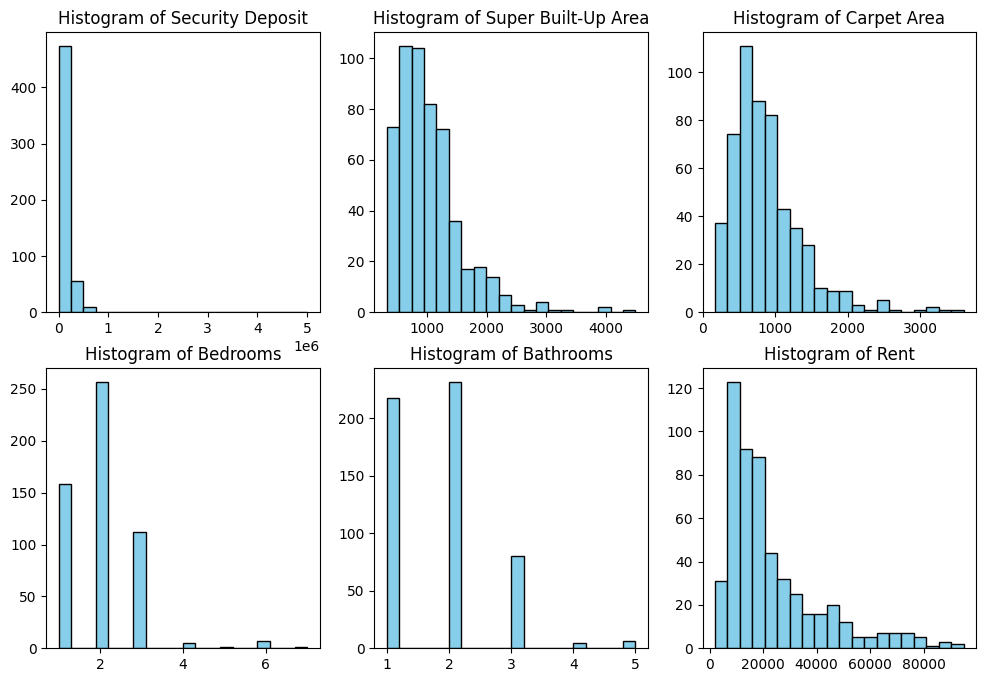

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')

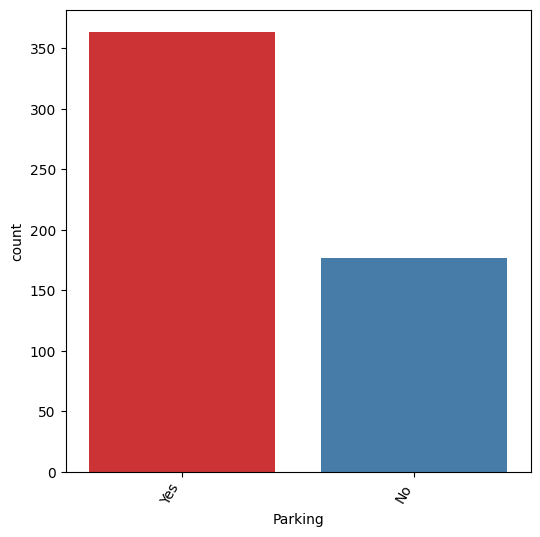

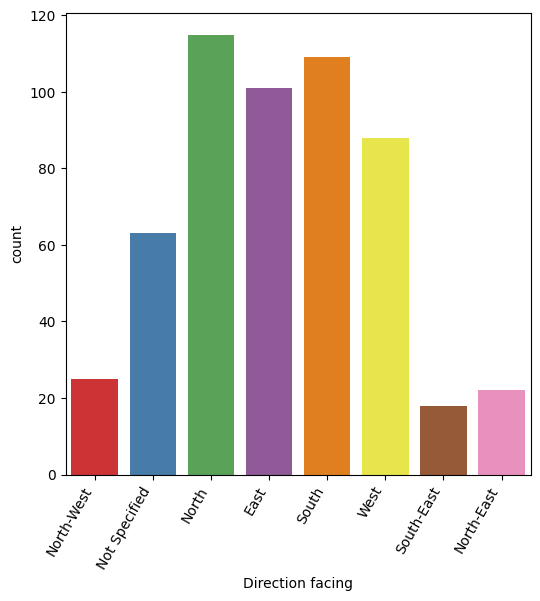

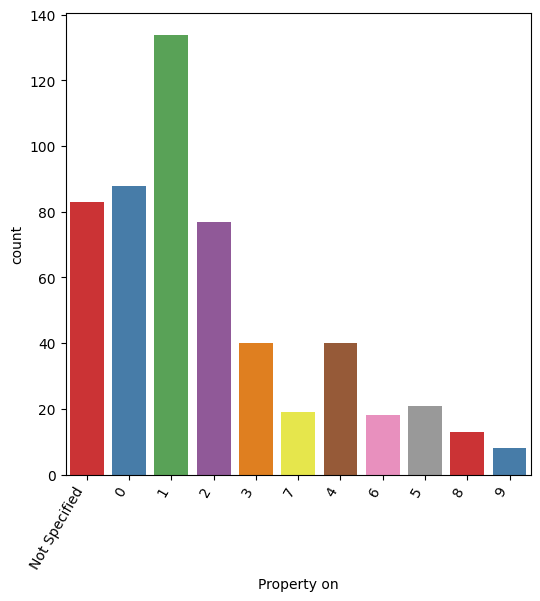

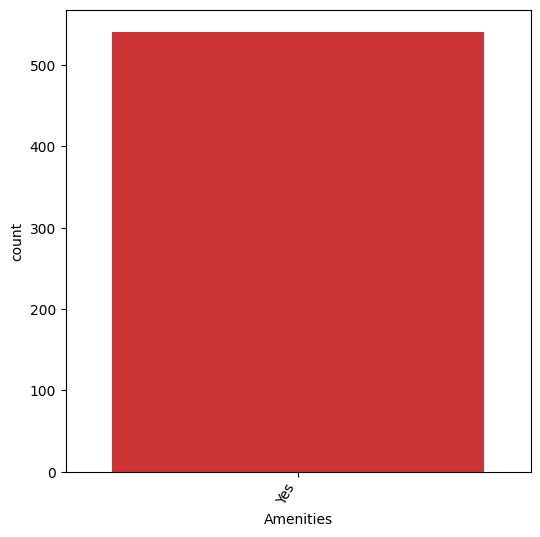

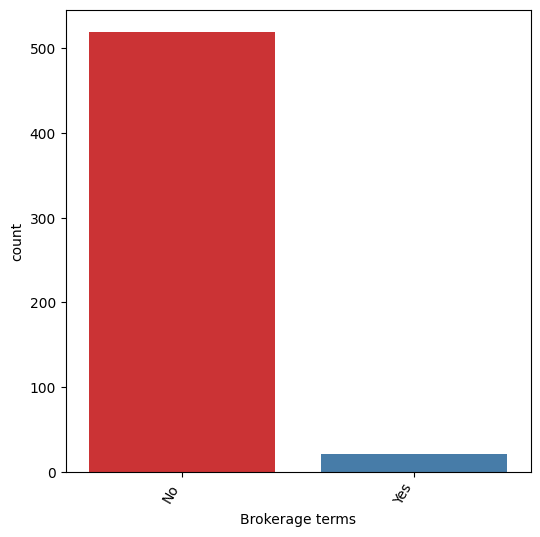

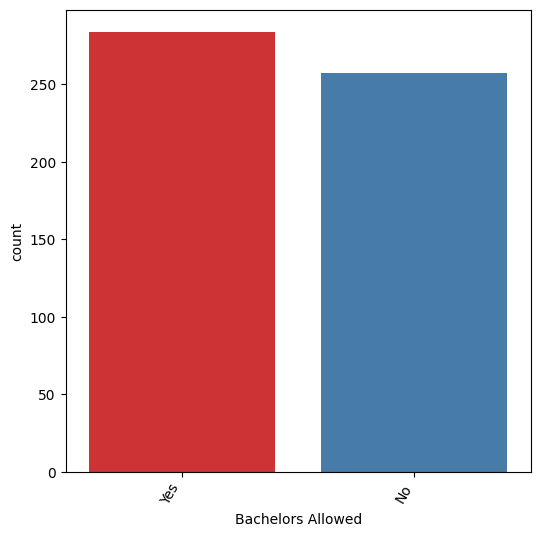

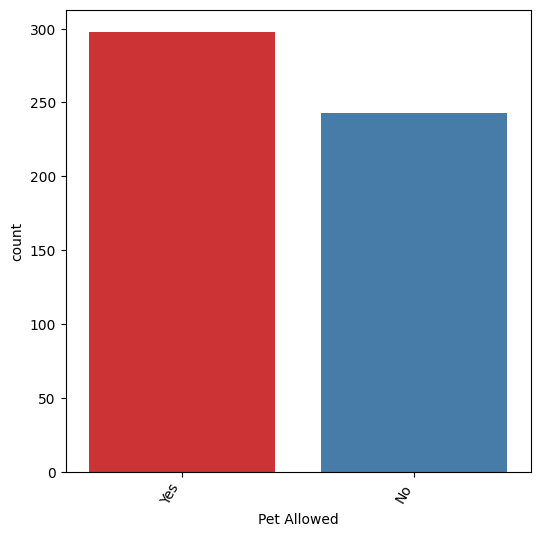

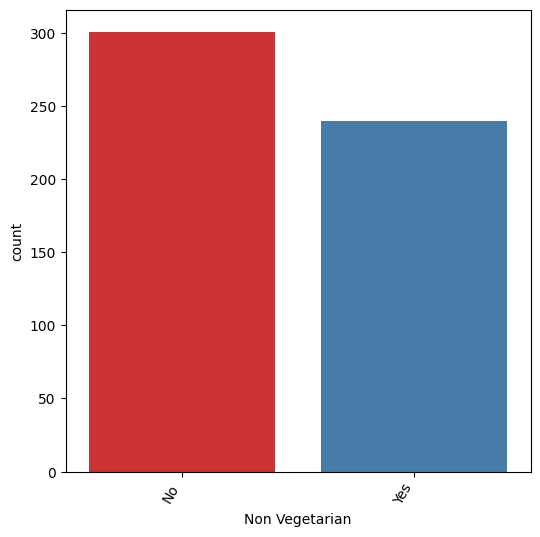

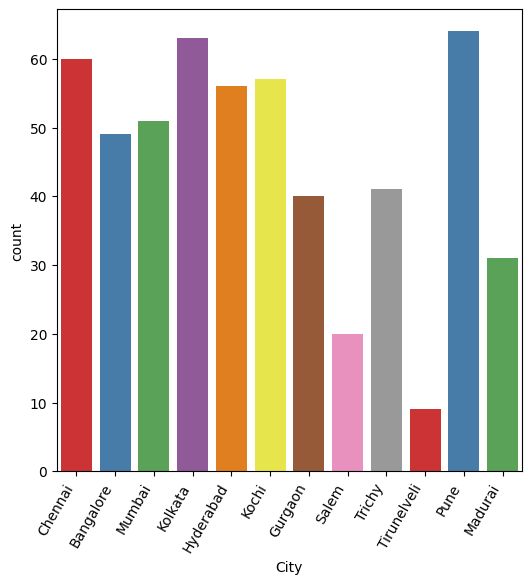

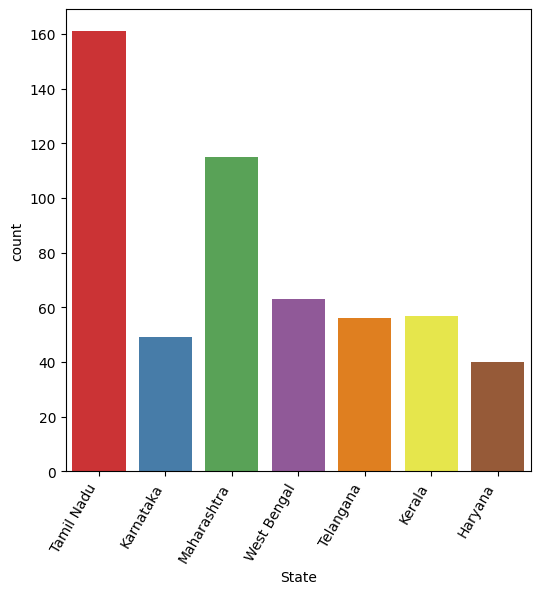

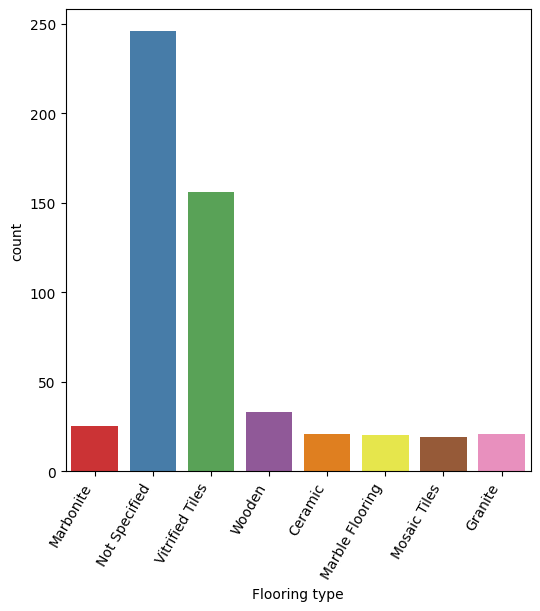

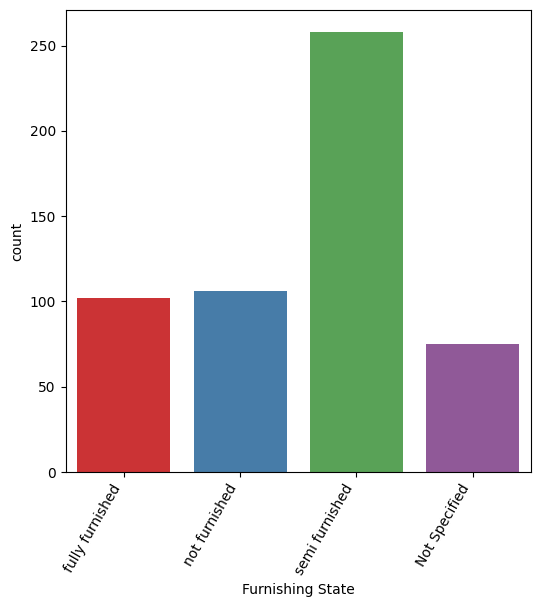

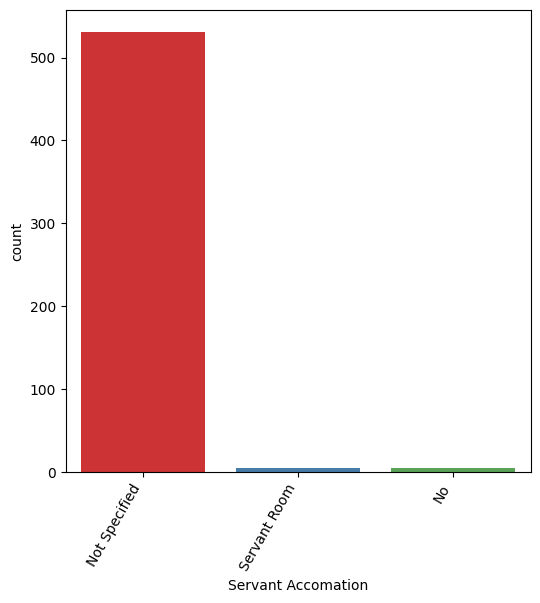

In [25]:
categorical_columns=['Parking', 'Direction facing','Property on','Amenities','Brokerage terms', 'Bachelors Allowed','Pet Allowed', 'Non Vegetarian','City', 'State','Flooring type', 'Furnishing State','Servant Accomation']
for feature in categorical_columns:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    sns.countplot(x=feature,hue=feature,data=df,palette='Set1',ax=axes)
    plt.xticks(rotation=60, ha='right')

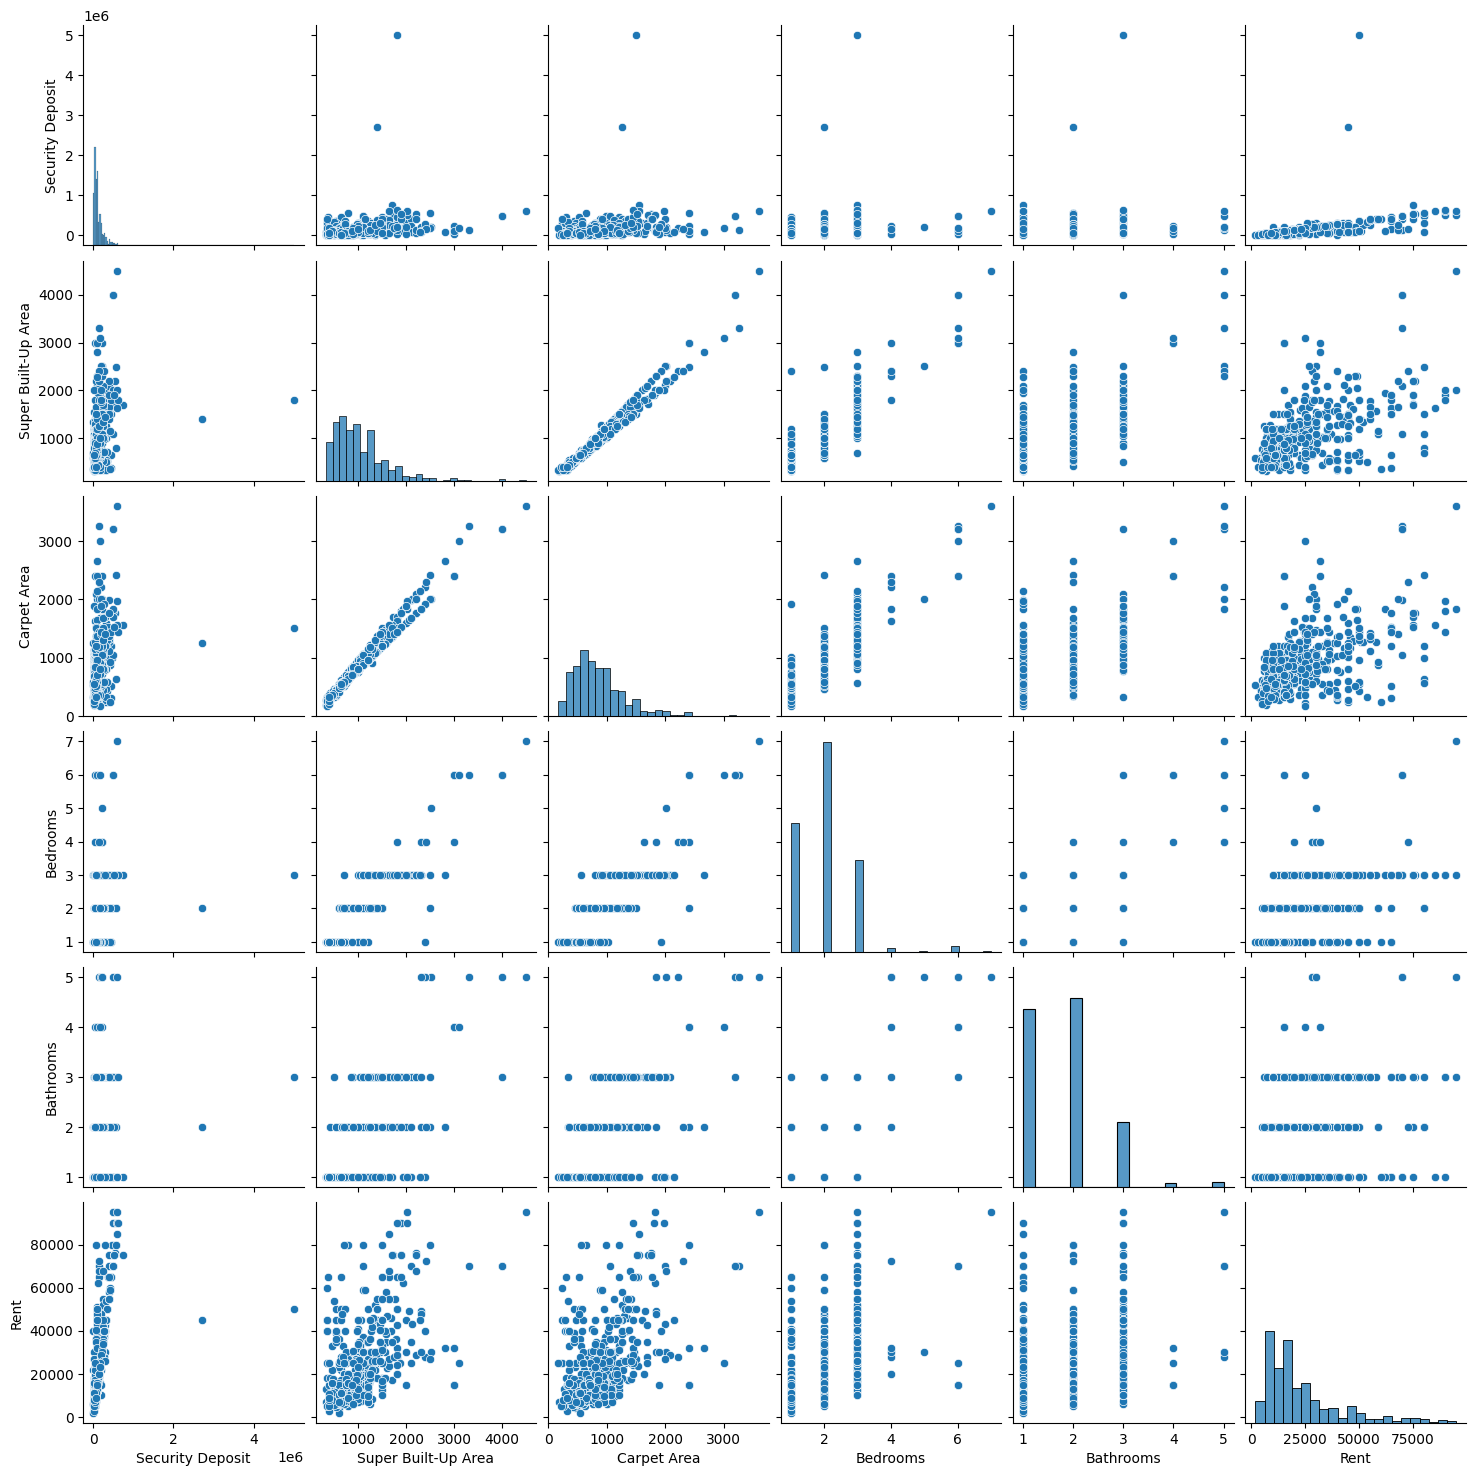

In [26]:
sns.pairplot(df)

<Axes: >

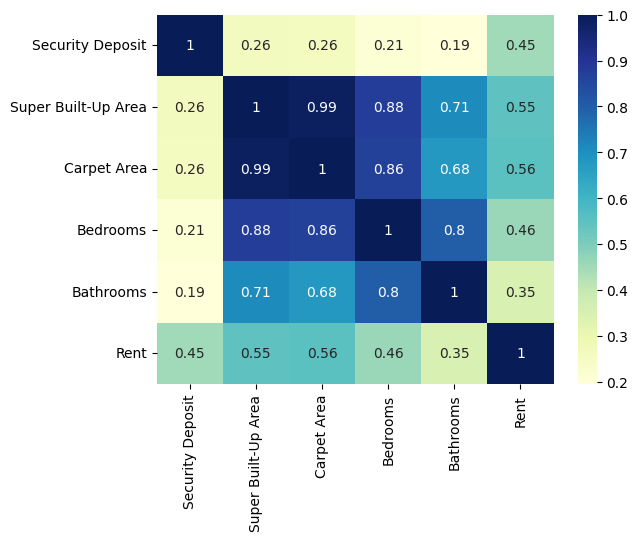

In [27]:
sns.heatmap(df[numerical_features].corr(), annot=True,cmap='YlGnBu')

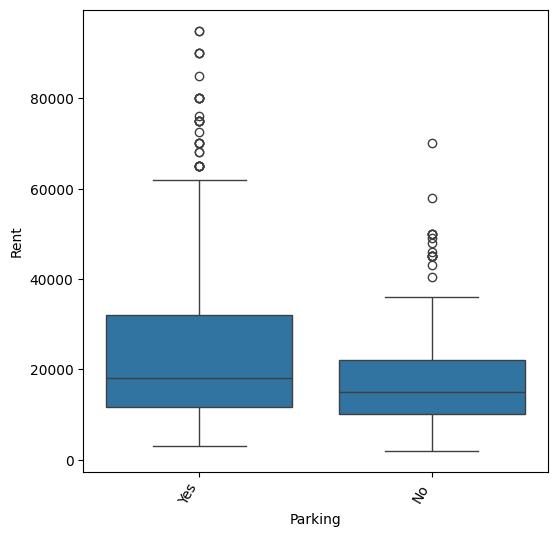

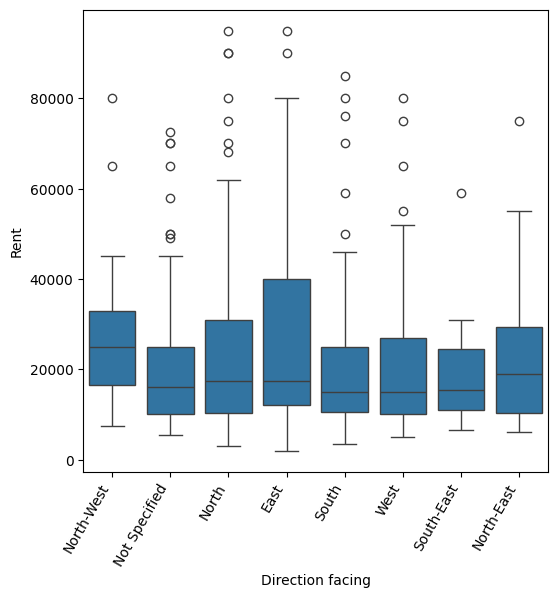

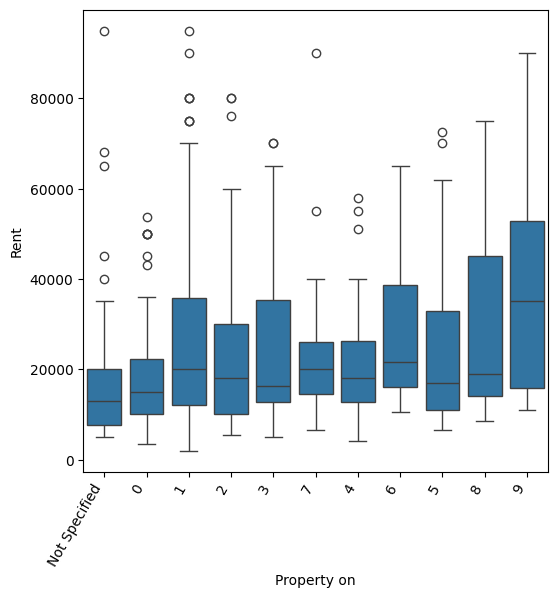

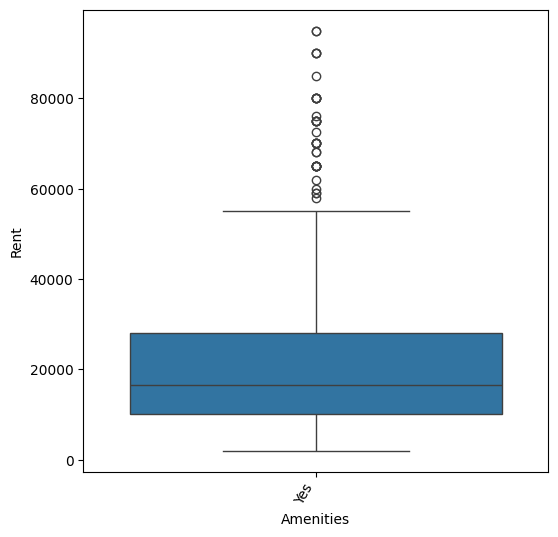

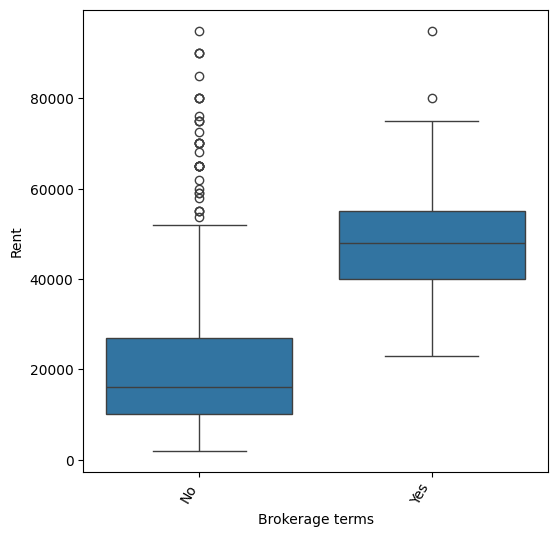

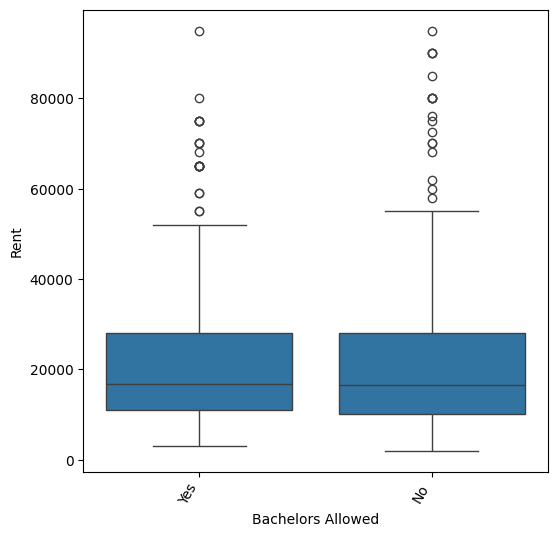

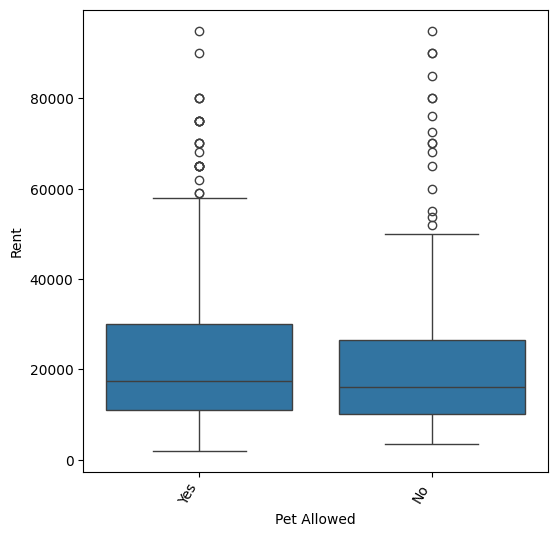

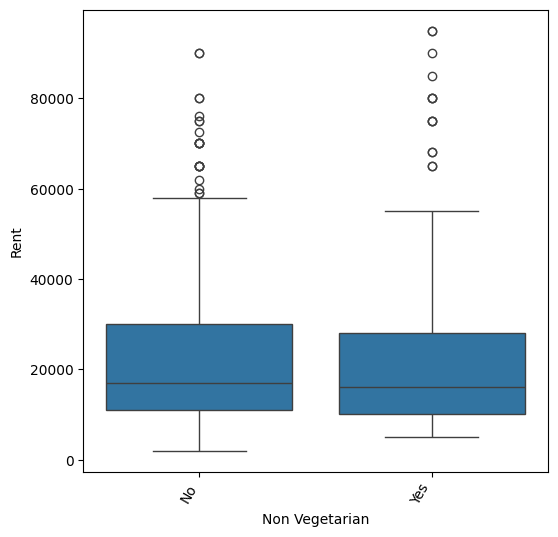

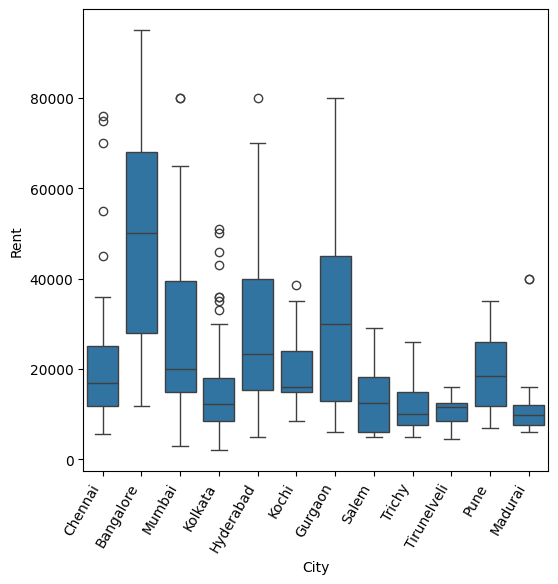

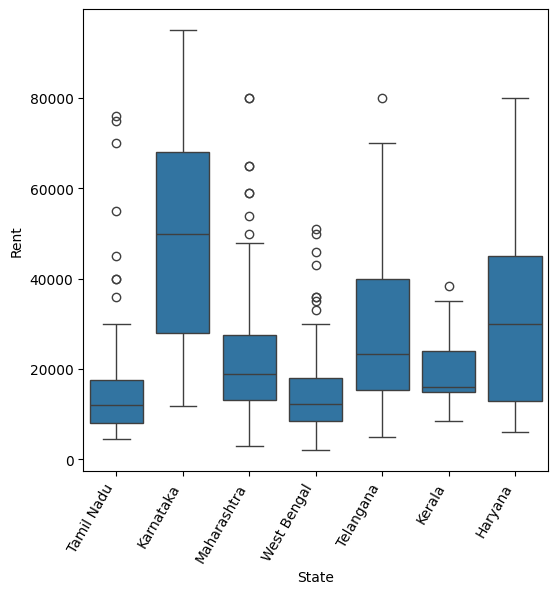

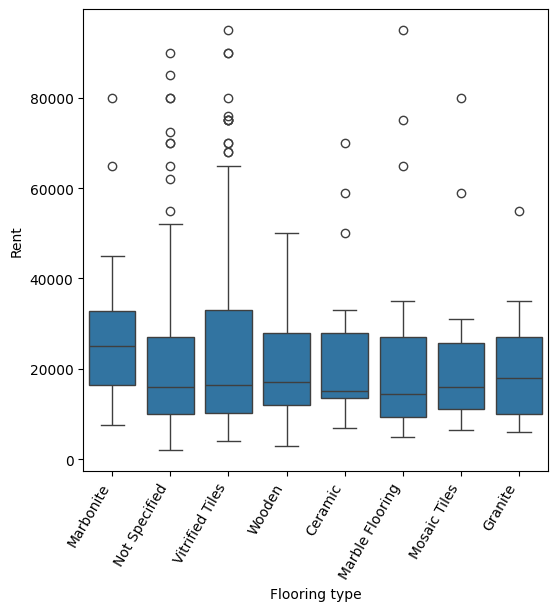

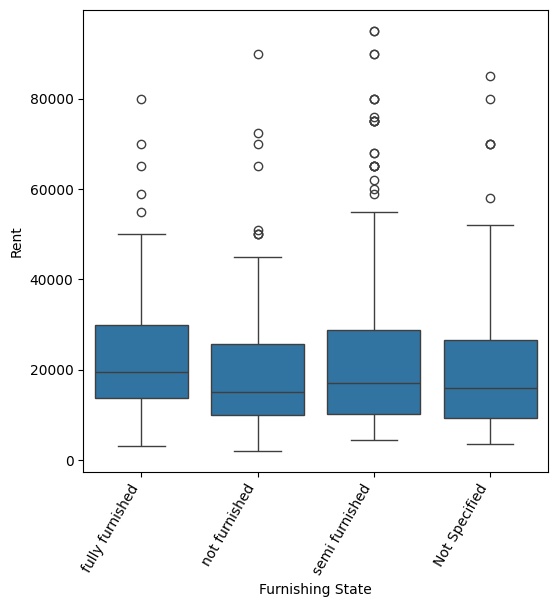

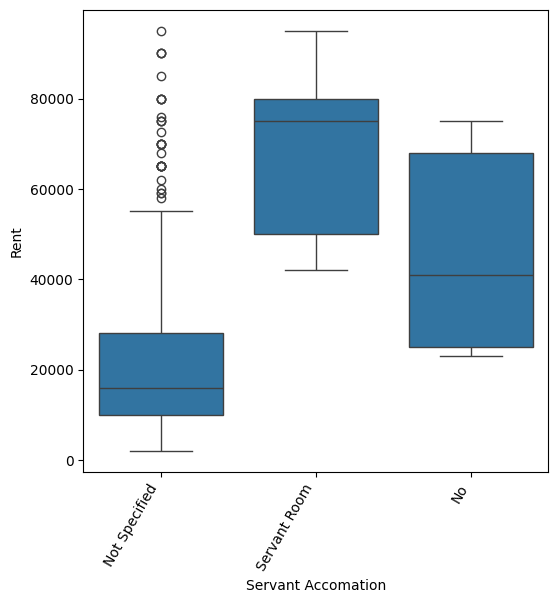

In [28]:
for feature in categorical_columns:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    sns.boxplot(x=feature,y="Rent",data=df,ax=axes)
    plt.xticks(rotation=60, ha='right')

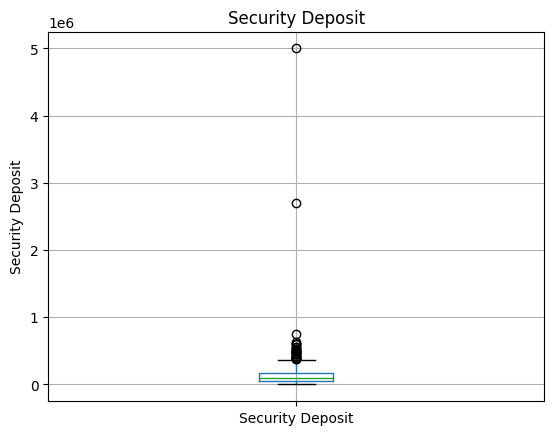

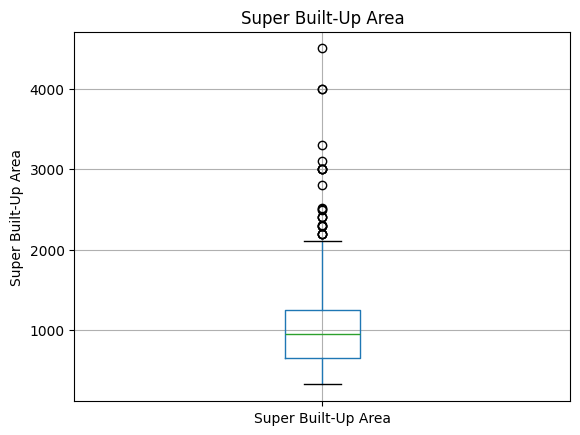

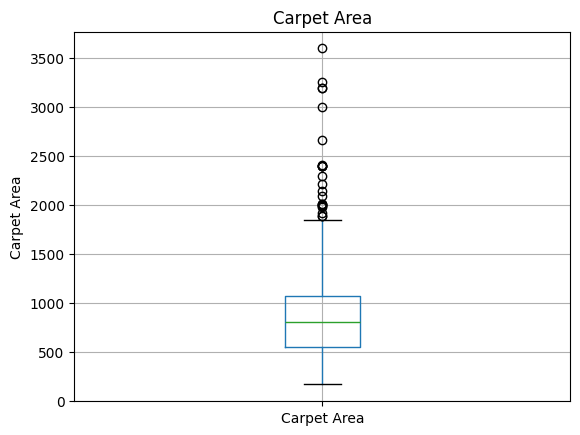

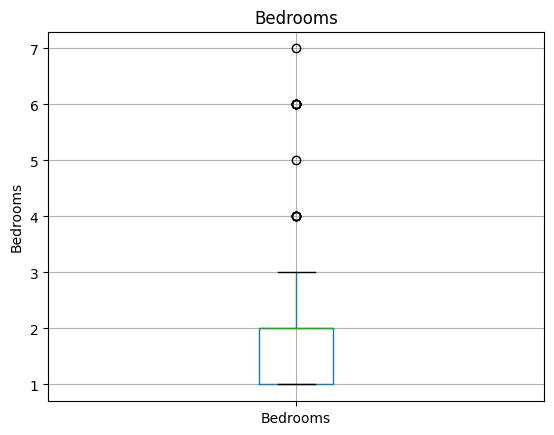

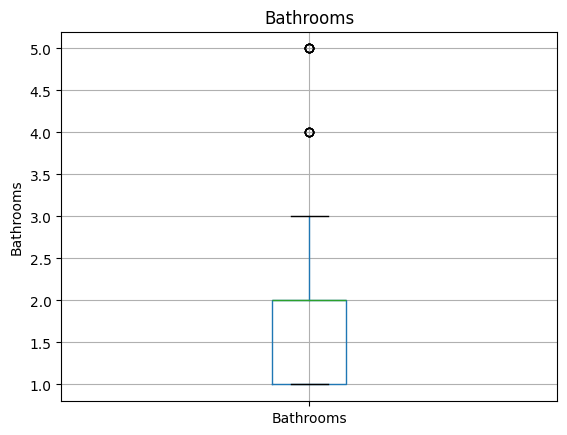

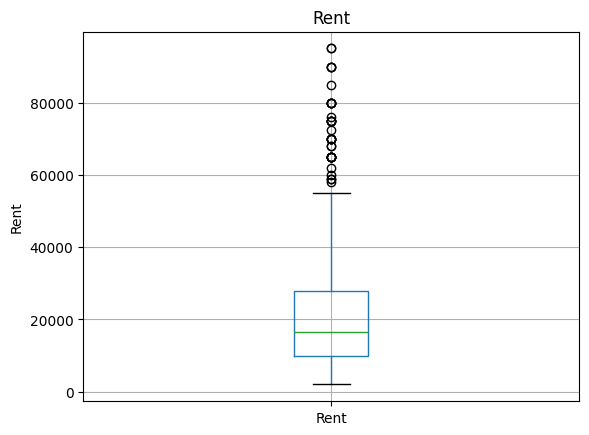

In [29]:
for feature in numerical_features:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [19]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [20]:
outliers_column=[]
for feature in numerical_features:
    sample_outliers = detect_outliers_iqr(df[feature])
    if len(sample_outliers)>0:
        print(f"{feature}", len(sample_outliers))
        outliers_column.append(feature)

Security Deposit 33
Super Built-Up Area 24
Carpet Area 24
Bedrooms 14
Bathrooms 11
Rent 37


In [21]:
for feature in outliers_column[:-1]:
    tenth_percentile = np.percentile(df[feature], 10)
    ninetieth_percentile = np.percentile(df[feature], 90)
    df[feature]=np.clip(df[feature],tenth_percentile,ninetieth_percentile)

In [22]:
scaling_features=numerical_features.copy()
skewness=df[scaling_features].skew(axis=0, skipna=True)
skew_df=pd.DataFrame(skewness,columns=["Skweness"])
skew_list=skew_df[skew_df["Skweness"]>0.75].index.tolist()
skew_list

['Security Deposit', 'Rent']

In [23]:
outliers_column=[]
for feature in numerical_features:
    sample_outliers = detect_outliers_iqr(df[feature])
    if len(sample_outliers)>0:
        print(f"{feature}", len(sample_outliers))
        outliers_column.append(feature)

Rent 37


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
target='Rent'
X = df.drop(target, axis=1)
y = df[[target]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)

In [54]:
X_train.head()

,Parking,Direction facing,Property on,Brokerage terms,Bachelors Allowed,Security Deposit,Pet Allowed,Non Vegetarian,Super Built-Up Area,Carpet Area,Bedrooms,Bathrooms,City,State,Amenities,Flooring type,Furnishing State,Servant Accomation
12,No,Not Specified,Not Specified,No,No,200000.0,No,Yes,650,610,2.0,2.0,Chennai,Tamil Nadu,Yes,Not Specified,Not Specified,Not Specified
514,Yes,East,2,No,Yes,71400.0,No,Yes,1200,1080,2.0,2.0,Hyderabad,Telangana,Yes,Vitrified Tiles,semi furnished,Not Specified
112,Yes,West,1,No,No,30000.0,Yes,Yes,500,380,1.0,1.0,Hyderabad,Telangana,Yes,Vitrified Tiles,not furnished,Not Specified
484,Yes,East,3,No,Yes,297500.0,No,No,1720,1448,3.0,3.0,Bangalore,Karnataka,Yes,Vitrified Tiles,semi furnished,Not Specified
270,No,South,Not Specified,No,No,70000.0,Yes,No,1001,865,2.0,1.0,Chennai,Tamil Nadu,Yes,Not Specified,Not Specified,Not Specified


In [55]:
numerical_features=[column for column in X_train.columns if X_train[column].dtype!='O']
categorical_features=[column for column in X_train.columns if X_train[column].dtype=='O']
print(f"Numerical features : {numerical_features}")
print(f"Categorical features : {categorical_features}")
target_transformer=Pipeline(steps=[('skew_correction', FunctionTransformer(np.log1p,inverse_func=np.exp)),('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[
            ('cat_transformer', OneHotEncoder(handle_unknown='ignore'),categorical_features),
            ('num_transformer', StandardScaler(),numerical_features),
            ])

Numerical features : ['Security Deposit', 'Super Built-Up Area', 'Carpet Area', 'Bedrooms', 'Bathrooms']
Categorical features : ['Parking', 'Direction facing', 'Property on', 'Brokerage terms', 'Bachelors Allowed', 'Pet Allowed', 'Non Vegetarian', 'City', 'State', 'Amenities', 'Flooring type', 'Furnishing State', 'Servant Accomation']


In [56]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [57]:
y_test

,Rent
176,18000.0
337,6000.0
154,41000.0
296,8300.0
429,70000.0
...,...
381,65000.0
34,14000.0
212,16000.0
539,10000.0


In [58]:
y_train=target_transformer.fit_transform(y_train)
y_test=target_transformer.transform(y_test)

D:\Projects\Virtual Environments\real_estate\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


In [59]:
target_transformer.inverse_transform(y_test)

array([[18001.],
       [ 6001.],
       [41001.],
       [ 8301.],
       [70001.],
       [ 8001.],
       [75001.],
       [10001.],
       [35001.],
       [16001.],
       [40501.],
       [16501.],
       [25001.],
       [45001.],
       [68001.],
       [25001.],
       [12501.],
       [35001.],
       [32801.],
       [26001.],
       [70001.],
       [ 9701.],
       [ 7501.],
       [ 4001.],
       [30001.],
       [20001.],
       [25001.],
       [17001.],
       [ 4901.],
       [30001.],
       [22001.],
       [50001.],
       [25001.],
       [15001.],
       [10001.],
       [12001.],
       [26501.],
       [27001.],
       [15001.],
       [85001.],
       [ 8001.],
       [12001.],
       [17501.],
       [15001.],
       [ 9001.],
       [ 9001.],
       [22001.],
       [30001.],
       [10001.],
       [13001.],
       [ 2001.],
       [ 6001.],
       [30001.],
       [50001.],
       [15001.],
       [ 6501.],
       [76001.],
       [55001.],
       [14001.

In [50]:
np.exp(intermediate_y)

array([[18001.],
       [ 6001.],
       [41001.],
       [ 8301.],
       [70001.],
       [ 8001.],
       [75001.],
       [10001.],
       [35001.],
       [16001.],
       [40501.],
       [16501.],
       [25001.],
       [45001.],
       [68001.],
       [25001.],
       [12501.],
       [35001.],
       [32801.],
       [26001.],
       [70001.],
       [ 9701.],
       [ 7501.],
       [ 4001.],
       [30001.],
       [20001.],
       [25001.],
       [17001.],
       [ 4901.],
       [30001.],
       [22001.],
       [50001.],
       [25001.],
       [15001.],
       [10001.],
       [12001.],
       [26501.],
       [27001.],
       [15001.],
       [85001.],
       [ 8001.],
       [12001.],
       [17501.],
       [15001.],
       [ 9001.],
       [ 9001.],
       [22001.],
       [30001.],
       [10001.],
       [13001.],
       [ 2001.],
       [ 6001.],
       [30001.],
       [50001.],
       [15001.],
       [ 6501.],
       [76001.],
       [55001.],
       [14001.

In [46]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regressors = {
    "LinearRegression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {"alpha": [0.1, 1.0, 10.0]}),
    "Lasso": (Lasso(), {"alpha": [0.1, 1.0, 10.0]}),
    "DecisionTreeRegressor": (DecisionTreeRegressor(), {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    }),
    "RandomForestRegressor": (RandomForestRegressor(), {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    }),
    "GradientBoostingRegressor": (GradientBoostingRegressor(), {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    }),
    "SVR": (SVR(), {
        "kernel": ["linear", "rbf"],
        "C": [0.1, 1, 10],
        "gamma": ["scale", "auto"]
    }),
    "KNeighborsRegressor": (KNeighborsRegressor(), {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    }),
    "XGboostRegressor":(XGBRegressor(objective='reg:squarederror'), {
        "n_estimators": [100, 200, 300],        
        "learning_rate": [0.01, 0.1, 0.2],       
        "max_depth": [3, 5, 7],                             
        })
}

# Perform Grid Search CV for each regressor
best_estimators = {}
for name, (model, params) in regressors.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = {
                'model': grid_search.best_estimator_,
                'best_params': grid_search.best_params_,
                'rmse': np.sqrt(-grid_search.best_score_),
            }
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {np.sqrt(-grid_search.best_score_):.4f} (RMSE)\n")

Tuning hyperparameters for LinearRegression...
Best parameters for LinearRegression: {}
Best score for LinearRegression: 20255410713.5680 (RMSE)

Tuning hyperparameters for Ridge...
Best parameters for Ridge: {'alpha': 10.0}
Best score for Ridge: 0.5014 (RMSE)

Tuning hyperparameters for Lasso...
Best parameters for Lasso: {'alpha': 0.1}
Best score for Lasso: 0.5753 (RMSE)

Tuning hyperparameters for DecisionTreeRegressor...
Best parameters for DecisionTreeRegressor: {'max_depth': None, 'min_samples_split': 10}
Best score for DecisionTreeRegressor: 0.5204 (RMSE)

Tuning hyperparameters for RandomForestRegressor...


D:\Projects\Virtual Environments\real_estate\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters for RandomForestRegressor: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score for RandomForestRegressor: 0.4416 (RMSE)

Tuning hyperparameters for GradientBoostingRegressor...


D:\Projects\Virtual Environments\real_estate\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best score for GradientBoostingRegressor: 0.4397 (RMSE)

Tuning hyperparameters for SVR...


D:\Projects\Virtual Environments\real_estate\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters for SVR: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVR: 0.4676 (RMSE)

Tuning hyperparameters for KNeighborsRegressor...


D:\Projects\Virtual Environments\real_estate\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for KNeighborsRegressor: {'n_neighbors': 7, 'weights': 'distance'}
Best score for KNeighborsRegressor: 0.5565 (RMSE)

Tuning hyperparameters for XGboostRegressor...
Best parameters for XGboostRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score for XGboostRegressor: 0.4512 (RMSE)



In [49]:
best_model_name = min(best_estimators.keys(), key=lambda x: best_estimators[x]['rmse'])

print("Best RandomForestRegressor model:", best_model_name)
best_model=best_estimators[best_model_name]['model']

Best RandomForestRegressor model: GradientBoostingRegressor


In [51]:
predict=best_model.predict(X_test)

In [58]:
ans=target_transformer.inverse_transform([predict])

In [60]:
ans.flatten()

array([ 9.80030454,  8.6328885 , 10.86875546,  9.00201587, 11.02514285,
        9.01814878, 11.42514159,  9.29108702, 10.45612192,  9.60754762,
       10.43101958,  9.71188153, 10.11570883, 10.5791997 , 10.08275   ,
        9.99488207,  9.69722497,  9.98091322, 10.56488052, 10.11806115,
       11.0546176 ,  9.41612417,  9.00334106,  8.91441689, 10.16005425,
       10.02620517, 10.08255961,  9.70606824,  8.86986903, 10.03053717,
       10.05536525, 10.93775375, 10.09224434,  9.56363189,  9.4788253 ,
        9.40986907, 10.18026696, 10.03144622,  9.6978942 , 10.7890966 ,
        9.33915632,  9.34063325, 10.26668173,  9.40475185,  9.15179268,
        9.10079893, 10.23384822, 10.31326267,  9.25276193,  9.68043591,
        8.96537612,  8.85428639, 10.29515962, 10.75028456,  9.48166205,
        8.84527332, 11.0858021 , 10.83596981,  9.52690485, 11.12485192,
        8.98128087,  9.70602037, 10.98640653, 10.95817193, 10.29939518,
        9.50449103,  9.15596529,  9.82861114, 10.5743035 ,  9.81

In [ ]:
import dagshub
dagshub.init(repo_owner='', repo_name='', mlflow=True)

import mlflow
# with mlflow.start_run():
#   mlflow.sklearn.log_model('best_model','best_model')
#   mlflow.log_metric('mse',0.2)

Accessing as k.balamurali303

Initialized MLflow to track repo "k.balamurali303/RentPricePrediction"

Repository k.balamurali303/RentPricePrediction initialized!

In [41]:
import mlflow
experiments = mlflow.search_runs(order_by=["start_time DESC"],max_results=1)

In [42]:
import json
experiments=json.loads(experiments.to_json())

In [43]:
experiments

{'run_id': {'0': '4a7a165f1b62439ba16fd5801b681c36'},
 'experiment_id': {'0': '0'},
 'status': {'0': 'FINISHED'},
 'artifact_uri': {'0': 'mlflow-artifacts:/ad75e6c289b144b6a5f5c271b08eabf2/4a7a165f1b62439ba16fd5801b681c36/artifacts'},
 'start_time': {'0': 1731327909586},
 'end_time': {'0': 1731327921562},
 'metrics.mae': {'0': 0.3048848236},
 'metrics.r2': {'0': 0.8389733283},
 'metrics.mse': {'0': 0.1507164861},
 'tags.mlflow.user': {'0': 'k.balamurali303'},
 'tags.mlflow.source.type': {'0': 'LOCAL'},
 'tags.mlflow.runName': {'0': 'nimble-robin-640'},
 'tags.mlflow.source.name': {'0': 'src/components/model_trainer.py'},
 'tags.mlflow.log-model.history': {'0': '[{"run_id": "4a7a165f1b62439ba16fd5801b681c36", "artifact_path": "best_model", "utc_time_created": "2024-11-11 12:25:10.135270", "flavors": {"python_function": {"model_path": "model.pkl", "predict_fn": "predict", "loader_module": "mlflow.sklearn", "python_version": "3.12.7", "env": {"conda": "conda.yaml", "virtualenv": "python_e

In [44]:
loaded_model = mlflow.sklearn.load_model(f"runs:/4a7a165f1b62439ba16fd5801b681c36/best_model")

In [47]:
type(loaded_model.predict(X_test))

ValueError: Feature shape mismatch, expected: 70, got 69

In [93]:
client = mlflow.tracking.MlflowClient()

local_path =client.download_artifacts('2c580751dccd4de5928291290afbc864',"best_model/model.pkl", dst_path="./")

In [96]:
import pickle
with open(local_path, 'rb') as f:
    model = pickle.load(f)

In [98]:
predict=model.predict(X_test)
mean_squared_error(predict,y_test)

AttributeError: 'str' object has no attribute 'predict'

In [46]:
models=client.search_registered_models(filter_string=f"name = 'best_model1'")

In [47]:
models

[]

In [106]:
client = mlflow.tracking.MlflowClient()
model_version = client.get_latest_versions('best_model')[0].source


C:\Users\Balamurali\AppData\Local\Temp\ipykernel_324\4138208628.py:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  model_version = client.get_latest_versions('best_model')


[<ModelVersion: aliases=[], creation_timestamp=1731328088407, current_stage='None', description='', last_updated_timestamp=1731328088407, name='57261_best_model', run_id='4a7a165f1b62439ba16fd5801b681c36', run_link='', source='runs:/4a7a165f1b62439ba16fd5801b681c36/best_model', status='READY', status_message='', tags={}, user_id='', version='1'>]

In [112]:
model_version

'runs:/4a7a165f1b62439ba16fd5801b681c36/best_model'

In [107]:
model = mlflow.sklearn.load_model('runs:/4a7a165f1b62439ba16fd5801b681c36/best_model')

In [108]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
client.create_registered_model("best_model1")
new_version = client.create_model_version(
            name="best_model1",
            source=f"runs:/17a985f72d5e4a6faafa8f6dd85f60d5/best_model",
            run_id='17a985f72d5e4a6faafa8f6dd85f60d5'
        )

2024/11/11 17:50:23 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: best_model1, version 1


In [68]:
new_version

<ModelVersion: aliases=[], creation_timestamp=1731327369250, current_stage='None', description='', last_updated_timestamp=1731327369250, name='best_model', run_id='17a985f72d5e4a6faafa8f6dd85f60d5', run_link='', source='runs:/17a985f72d5e4a6faafa8f6dd85f60d5/best_model', status='READY', status_message='', tags={}, user_id='', version='3'>